In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from Tree import Tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('cameras.csv')
df.dropna(inplace=True) # dropping only 2 rows
df.drop(df[df['Low resolution'] == 0.0].index, inplace=True) # dropping 50 rows
df.drop(df[df['Weight (inc. batteries)'] == 0.0].index, inplace=True) # dropping 19 rows
df.drop(df[df['Dimensions'] == 0.0].index, inplace=True) # dropping 3 rows
df.drop('Model', axis=1, inplace=True)
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
5,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
8,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0


In [25]:
df

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
5,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
8,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [111]:
train = df.sample(frac=0.8)
test  = df.drop(train.index)
X_train = train.drop('Price', axis=1)
X_test  =  test.drop('Price', axis=1)
Y_train = train.Price
Y_test  =  test.Price 

In [112]:
print(df.columns)

Index(['Release date', 'Max resolution', 'Low resolution', 'Effective pixels',
       'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range',
       'Macro focus range', 'Storage included', 'Weight (inc. batteries)',
       'Dimensions', 'Price'],
      dtype='object')


In [113]:
X_test

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0
19,2006,2272.0,1600.0,4.0,39.0,125.0,47.0,1.0,16.0,200.0,103.0
21,2007,2592.0,2048.0,5.0,38.0,122.0,47.0,1.0,16.0,215.0,106.0
23,1998,1024.0,512.0,0.0,35.0,35.0,50.0,9.0,8.0,240.0,105.0
32,1999,1024.0,512.0,0.0,28.0,70.0,50.0,17.0,8.0,290.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...
997,2005,2592.0,2048.0,5.0,38.0,114.0,50.0,6.0,32.0,250.0,91.0
1001,2006,3072.0,2592.0,7.0,38.0,114.0,50.0,2.0,58.0,157.0,89.0
1009,1999,640.0,320.0,0.0,40.0,400.0,1.0,1.0,1.0,500.0,138.0
1017,2001,1472.0,1280.0,1.0,41.0,328.0,25.0,3.0,1.0,660.0,126.0


In [114]:
np.unique(train.Price)

array([  14.,   19.,   62.,   99.,  119.,  126.,  129.,  139.,  146.,
        149.,  159.,  169.,  177.,  179.,  199.,  229.,  249.,  269.,
        279.,  299.,  329.,  384.,  399.,  429.,  449.,  499.,  509.,
        549.,  599.,  799., 1199., 1299., 1399., 1499., 1599., 1699.,
       1799., 2499., 4499., 4699., 4999., 7999.])

In [117]:
tree = DecisionTreeRegressor(min_samples_leaf=12)
tree.fit(X_train, Y_train)
print(tree.score(X_test, Y_test))
print(np.count_nonzero(tree.predict(X_test) == Y_test))

0.5580646659589049
0


In [20]:
Y_predict = tree.predict(X_test)
residuals = Y_predict-Y_test
mean_error = residuals.abs().mean()

In [21]:
tree.score(X_train, Y_train)

0.5556618483644118

In [22]:
mean_error

250.85004362078496

(array([832.,  66.,  47.,   1.,   0.,   9.,   3.,   0.,   0.,   3.]),
 array([  14. ,  812.5, 1611. , 2409.5, 3208. , 4006.5, 4805. , 5603.5,
        6402. , 7200.5, 7999. ]),
 <a list of 10 Patch objects>)

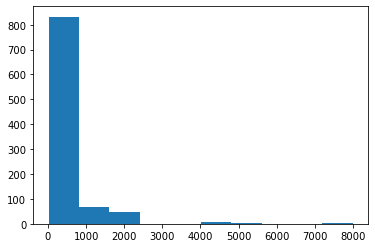

In [23]:
plt.hist(df.Price)

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.36653488779750976

In [49]:
train = df.sample(frac=0.8)
test  = df.drop(train.index)
X_train = train.drop('Release date', axis=1)
X_test  =  test.drop('Release date', axis=1)
Y_train = train['Release date']
Y_test  =  test['Release date']

In [60]:
dtr = DecisionTreeRegressor(min_samples_leaf=12)
dtr.fit(X_train, Y_train)
dtr.score(X_test, Y_test)

0.8551729314275133

Tree ploted


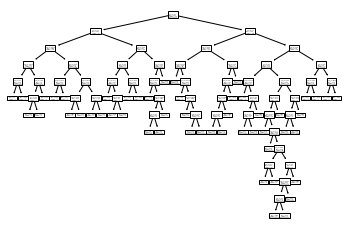

In [61]:
tree.plot_tree(dtr.fit(X_train, Y_train))
print("Tree ploted")

In [62]:
Y_predict = dtr.predict(X_test)
residuals = Y_predict-Y_test
mean_error = residuals.abs().mean()
dtr.score(X_train, Y_train)

0.890746493856707

In [33]:
mean_error

0.8155898103281451

In [36]:
release_dates = np.unique(df['Release date'])
release_dates

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007], dtype=int64)

(array([  4.,   7.,  26.,  45.,  55.,  79.,  84.,  89., 133., 139., 300.]),
 array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007], dtype=int64),
 <a list of 11 Patch objects>)

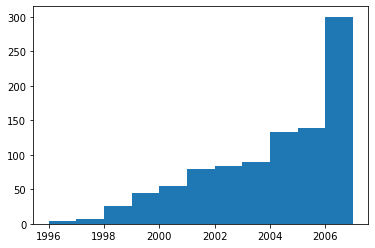

In [41]:
plt.hist(df['Release date'], bins=release_dates)

# Decision Tree Classifier

In [100]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
# dtc.predict(X_test)
dtc.score(X_test, Y_test)

0.453125

Tree ploted


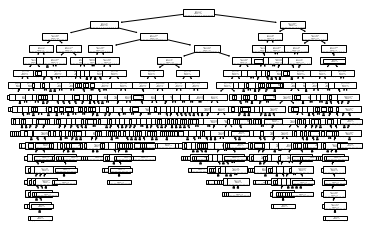

In [59]:
tree.plot_tree(dtc.fit(X_train, Y_train))
print("Tree ploted")

In [105]:
dtc_prior = DecisionTreeClassifier(class_weight={1996: 1, 1997: 2, 1998: 2, 1999: 4, 2000: 4, 2001: 8, 2002: 8, 2003: 8, 2004: 9, 2005: 14, 2006: 14, 2007: 30})
dtc_prior.fit(X_train, Y_train)
dtc_prior.score(X_test, Y_test)
# dic = {}
# for i in release_dates:
#     dic[i] = 1
# print(dic)

0.421875

Tree ploted


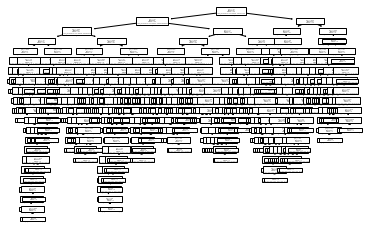

In [106]:
tree.plot_tree(dtc_prior.fit(X_train, Y_train))
print("Tree ploted")

In [108]:
depths = [2,3,4,5,8,10,15,20,25]
for d in depths:
    dtc_depth = DecisionTreeClassifier(max_depth = d)
    dtc_depth.fit(X_train, Y_train)
    s = dtc_depth.score(X_test, Y_test)
    print(f'Scored {s} for max_depth parameter: {d}')

Scored 0.2864583333333333 for max_depth parameter: 2
Scored 0.23958333333333334 for max_depth parameter: 3
Scored 0.3020833333333333 for max_depth parameter: 4
Scored 0.3541666666666667 for max_depth parameter: 5
Scored 0.421875 for max_depth parameter: 8
Scored 0.453125 for max_depth parameter: 10
Scored 0.4427083333333333 for max_depth parameter: 15
Scored 0.421875 for max_depth parameter: 20
Scored 0.4583333333333333 for max_depth parameter: 25
